
KLMED8004: Medical Statistics, Part 1 (2018)

John Zobolas (Ioannis Zompolas)

PhD Candidate, Department of Biology, NTNU

October 2018

## Task 1: Endocrinology

### Problem 4.74

Import the necessary library for reading SPSS files:


In [25]:
require(Hmisc)
# install it if you don't have it:
# install.packages("Hmisc")


Then convert the data:


In [2]:
boneden_data = spss.get("./BONEDEN.DAT.sav", use.value.labels=TRUE)


In this dataset, each row represents the measurements taken on two subjects (twin pairs, a total of 41), including height, bone density, etc. A complete description of the columns (as found on an online Data Set Description document) is provided below:

    Twin 1  Lighter Smoking Twin

    ht1         Height (cm)
    wt1         Weight (kg)
    tea1        Tea  (cups/week)
    cof1        Coffee  (cups/week)
    alc1        Alcohol  (drinks/week)
    cur1        Current Smoking (cigarettes/day)
    men1        Menopause Status (0=pre/1=post/2=unknown hysterectomy)
    pyr1        Pack-years smoking
    ls1         Lumbar spine (g/cm^2)
    fn1         Femoral neck (g/cm^2)
    fs1         Femoral shaft (g/cm^2)

    Twin 2  Heavier Smoking Twin

    ht2         Height (cm)
    wt2         Weight (kg)
    tea2        Tea  (cups/week)
    cof2        Coffee  (cups/week)
    alc2        Alcohol  (drinks/week)
    cur2        Current Smoking (cigarettes/day)
    men2        Menopause Status (0=pre/1=post/2=unknown hysterectomy)
    pyr2        Pack-years smoking
    ls2         Lumbar spine (g/cm^2)
    fn2         Femoral neck (g/cm^2)
    fs2         Femoral shaft (g/cm^2)

It's easy to verify that **the second twin is the heavier-smoking one**, if we plot the pack-years smoking data $(pyr1,pyr2)$ as well as the average value of years spend smoking:


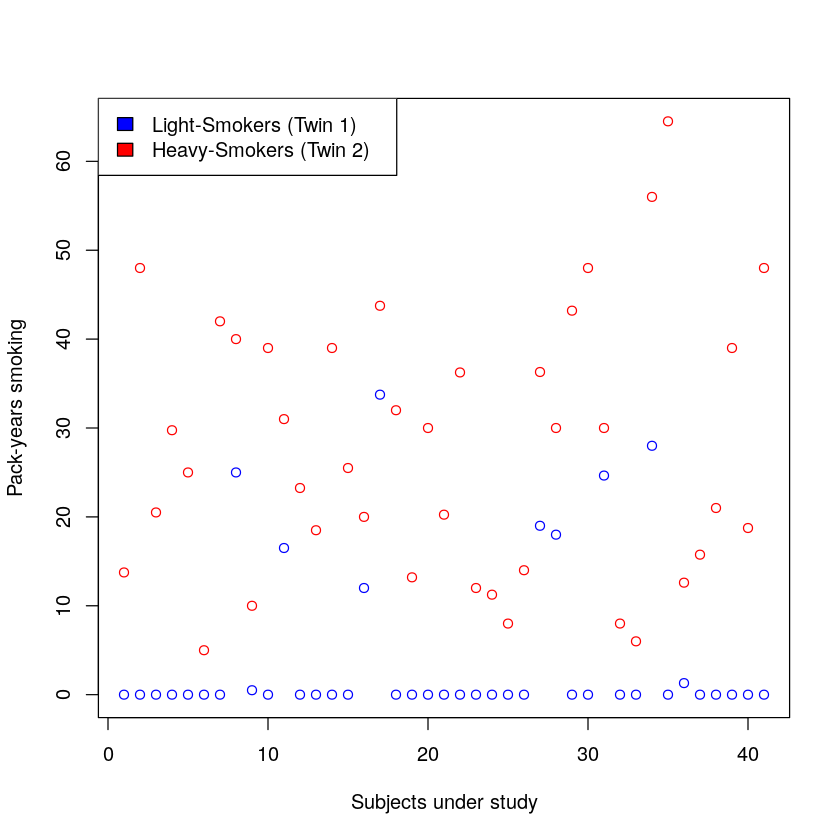

In [3]:
min_year = min(boneden_data$pyr1, boneden_data$pyr2)
max_year = max(boneden_data$pyr1, boneden_data$pyr2)
ylimit = c(min_year, max_year)
plot(boneden_data$pyr1, col = "blue", ylim = ylimit,
     xlab = "Subjects under study", ylab = "Pack-years smoking")
points(boneden_data$pyr2, col = "red")
legend("topleft",
       legend = c("Light-Smokers (Twin 1)", "Heavy-Smokers (Twin 2)"),
       fill = c("blue","red"))

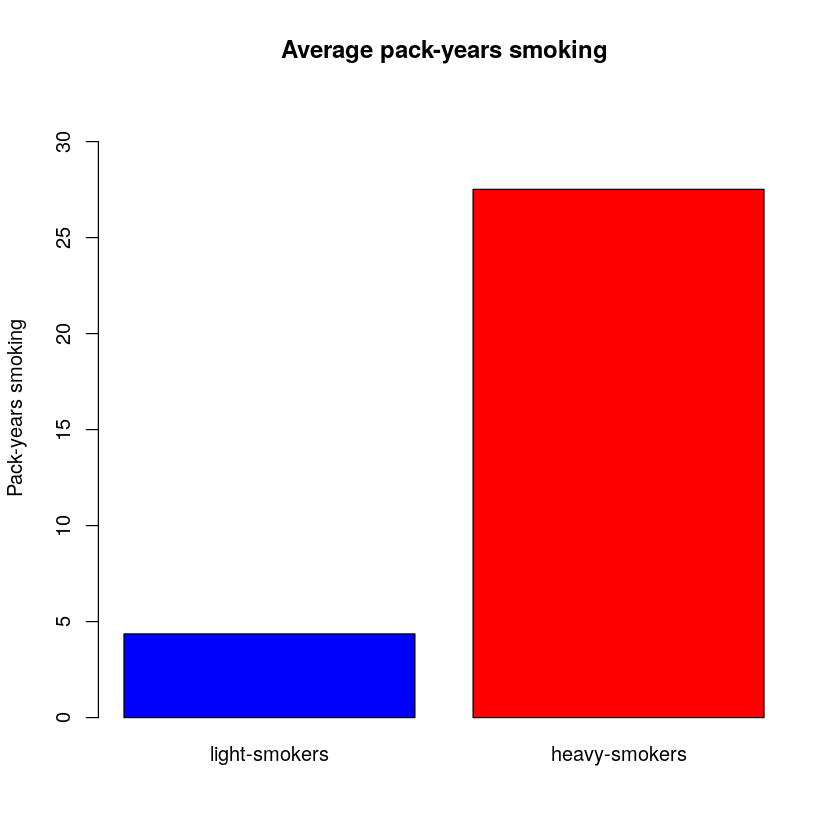

In [4]:
barplot(c(mean(boneden_data$pyr1), mean(boneden_data$pyr2)), ylim = ylimit/2,
        col = c("blue", "red"), names.arg = c("light-smokers","heavy-smokers"),
        ylab = "Pack-years smoking", main = "Average pack-years smoking")


The difference in bone density of the lumbar spine between the heavier smoking twin and the lighter one (measurements ${ls2,ls1}$ respectively) for each of the 41 pairs can be calculated as follows:


In [5]:
ls_diff = boneden_data$ls2 - boneden_data$ls1
ls_diff
sum(ls_diff < 0)

[1] -0.05 -0.12 -0.24  0.04 -0.19 -0.03 -0.08 -0.10  0.15 -0.12 -0.10  0.09
[13] -0.08 -0.07 -0.03  0.05  0.04 -0.04 -0.01 -0.06 -0.11 -0.05  0.03 -0.12
[25]  0.03  0.01  0.07  0.13 -0.03 -0.21 -0.05  0.03 -0.05 -0.01  0.11 -0.07
[37] -0.08 -0.08 -0.07  0.10 -0.10

[1] 28

So, a total of **28 pairs** had negative difference in the bone density of the lumbar spine. Using the *binomial distribution*, we can say that $n=41$ independent trials were conducted and in each one the probability of success (i.e. getting a negative bone density difference) would be $p=0.5$ (since it doesn't matter if the person is a heavy smoker or not, the difference could be positive - including zero - as many times as it could be negative). So, the expected number of twin pairs with negative difference scores would then be half the number of the pairs tested: $\mu=n\cdot p=41\cdot 0.5=20.5\simeq 21$, which is less than the 28 observed previously. Our initial hypothesis here is that **smoking is not related to the bone density** and to test this, we compute the probability of having 28 or more pairs with negative differences:

$$P(X\geq 28|p=0.5,n=41)=1-P(X\leq28|p=0.5,n=41)$$


In [6]:
1 - pbinom(28, size = 41, prob = 0.5)

[1] 0.005753895

So, $P(X\geq 28|p=0.5,n=41)\simeq 0.006=0.6\%$, which is smaller than the standard $5\%$ level of significance, indicating that the observed results are statistically significant. This means that we can safely reject our initial hypothesis, meaning that **we have strong reasons to believe that smoking is related to the bone density.**

### Problem 4.75

We continue by finding the differences in smoking between each pair $(pyr2-pyr1)$ and order the dataset based on these results in descending order (so data with corresponding higher smoking differences between the twins will come first). Then we keep only the subgroup of 20 twin pairs with the largest differences in smoking:



In [7]:
boneden_data$pyr_diff = boneden_data$pyr2 - boneden_data$pyr1
boneden_data_smoking_sorted = boneden_data[order(-boneden_data$pyr_diff),]
boneden_data_large_smoking_diff = boneden_data_smoking_sorted[1:20,]


Next, we can re-calculate for this subgroup the number of pairs that were having negative difference score in bone density:



In [8]:
ls_diff_subgroup = boneden_data_large_smoking_diff$ls2 - boneden_data_large_smoking_diff$ls1
ls_diff_subgroup
sum(ls_diff_subgroup < 0)

[1]  0.11 -0.12 -0.21 -0.10 -0.03 -0.08 -0.12 -0.07 -0.07 -0.05 -0.04 -0.06
[13]  0.04 -0.01 -0.03 -0.19  0.09 -0.08 -0.24 -0.11

[1] 17


So, **17 out of 20 pairs** had negative difference score in bone density, meaning that almost all heavy smokers had smaller bone density of the lumbar spine than their respective light-smoking twins. The expected number of pairs with negative difference score (using the binomial distribution again) would be: $\mu=n\cdot p=20\cdot 0.5=10$. So, while in both cases (all dataset group vs large smoking differences subgroup), the expected number of pairs to have negative difference score was $50\%$, the observed number increased from $\frac{28}{41}=68\%$ in the first case to $\frac{17}{20}=85\%$ in the subgroup with the large differences in pack-years smoking, indicating that smoking is directly related to the bone density of the lumbar spine. Also, using the same argument as in the previous problem we can calculate the probability of having more than 17 pairs out of 20:

$$P(X\geq 17|p=0.5,n=20)=1-P(X\leq17|p=0.5,n=20)$$


In [9]:
1 - pbinom(17, size = 20, prob = 0.5)

[1] 0.0002012253

So, $P(X\geq 17|p=0.5,n=41)\simeq 0.0002=0.02\%$, which is even smaller than before, indicating a stronger statistical significance and so we can more surely reject our initial hypothesis (that smoking and bone-density are un-related).

## Task 2: Infectious Disease

### Problem 4.23

In this problem we have 10 cases of gonorrhea that were reported over a 3-month period among 10.000 people living in an urban county (the prevalence is $P_{urban}=\frac{10}{10000}=0.1\%$), whereas the statewide incidences for the same time interval is 50 cases per 100.000 people, which is the same as 5 cases per 10.000 people (the prevalence is $P_{state}=\frac{5}{10000}=0.05\%$). Now, we see that in that specific ubran county there were double the number of cases of gonorrhea from what was expected (10 vs 5). We want to answer if this incidence is unusual. For that, we assume that the number of gonorrhea cases over a 3-month period among 10.000 people follows the *poisson distribution* with $\mu=5$ (the expected number of gonorrhea cases statewide over 10.000 people) and our initial hypothesis is that these 10 cases of gonorrhea are representative of the statewide statistics. So, we are going to calculate the probability of having 10 or more gonorrhea cases:
$$P(k\geq 10|\mu=5)=1-P(k\leq 9|\mu=5)$$


In [10]:
res = 1 - ppois(9, lambda = 5)
res

[1] 0.03182806

So, the probability of having 10 or more gonorrhea cases in the urban county is $\simeq 3.2\%$, which is smaller with the standard level of significance $(5\%)$, thus indicating that the results are statistically significant and so we can reject our initial hypothesis (that the 10 gonorrhea cases were normal), indicating that **the cases of gonorrhea in the urban county were excessive during that period.**

## Task 3: Cardiovascular Disease

It is given that serum cholesterol is approximately normally distributed, with mean $\mu=219\text{ mg/dL}$ and standard deviation $\sigma=50\text{ mg/dL}$.

### Problem 5.14

If the clinically desirable levels of cholesterol are those below 200 mg/dL, then the proportion of people that have such levels of cholesterol are:
$$P(X\lt200)=P(\frac{X-219}{50}\lt\frac{200-219}{50})=P(z\lt-0.38)=\Phi(-0.38)=1-\Phi(0.38)\simeq 35,2\%$$


In [11]:
res1 = 1 - pnorm(0.38)
res1

[1] 0.3519727

where we used the standardization technique ($z\sim N(0,1)$) and the symmetry properties of the standard normal distribution.

### Problem 5.15

The proportion of the population that has a high risk for heart disease, indicated by cholesterol levels above 250 mg/dL, is:
$$P(X\gt250)=P(\frac{X-219}{50}\gt\frac{250-219}{50})=P(z\gt0.62)=1-P(z\leq0.62)=1-\Phi(0.62)\simeq 26,7\%$$


In [12]:
res2 = 1 - pnorm(0.62)
res2

[1] 0.2676289


### Problem 5.16

The proportion of the general population that has borderline high-cholesterol levels (above 200 mg/dL and below 250 mg/dL), is:

$$P(200\lt X\lt250)=1-[P(X\lt200)+P(X\gt250)]\simeq38\%$$


In [13]:
res3 = 1 - (res1 + res2)
res3

[1] 0.3803984

where we used the answers from the previous problems and the fact that the total area (total probability) under the normal distribution's pdf is equal to 1.

## Task 4: Cancer

In this study, we have two groups of patients, one (the Vitamin E group - we will use the symbol $E$ for this group) that was given vitamin E and the other (the placebo group - we will use the symbol $P$ for this group) that was given similar-sized placebo capsules over a 3-month period. The **change in vitamin E serum levels** was recorded for each patient (3-month - baseline) and we assume that the data follows the normal distribution with parameters as defined in the table below:

Group|Mean($\mu$)|sd($\sigma$)|n
---|---|---|---
Vitamin E ($E$)|0.80|0.48|10
Placebo ($P$)|0.05|0.16|10

### Problem 5.36

If the threshold value in vitamin serum E change for compliance - meaning that a larger value than the threshold would indicate that the person is taking vitamin E - is 0.30 mg/dL, then the percentage of the vitamin E group that would be *positive* to this (would have a larger value than the specified threshold) would be:
$$P_{E}(X\geq 0.30)=P(\frac{X-0.80}{0.48}\geq\frac{0.30-0.80}{0.48})=P(z\geq -1.042)=P(z\leq 1.042)=\Phi(1.042)\simeq85\%$$


In [14]:
res4 = pnorm(1.042)
res4

[1] 0.8512942

where we used the summetry properties of the standard normal distribution, namely that $P(z \geq z_0 | z_0<0)=P(z \leq -z_0)$ (1).

### Problem 5.37

The E vitamin group represent the *Positives*, i.e. the patients that took vitamin E, whereas the placebo group represents the *Negatives*, i.e. the ones that did not take vitamin E. The test criterion in the problem 5.36 defines what is considered as *true* regarding the vitamin E consumption: the threshold, above which, someone is a compliant vitamin E taker. So, when this test is used in the vitamin E group, it is a measure of **sensitivity** (finds the true positives out of the positives).

### Problem 5.38

The percentage of the placebo group that would be *negative* to the above test criterion (they would have a change of vitamin serum E less than the specified threshold of 0.30 mg/dL), is:
$$P_{P}(X\leq 0.30)=P(\frac{X-0.05}{0.16}\leq\frac{0.30-0.05}{0.16})=P(z\leq 1.5625)=\Phi(1.5625)\simeq94\%$$


In [15]:
res5 = pnorm(1.5625)
res5

[1] 0.9409149


### Problem 5.39

The measure in problem 5.38 is a measure of **specificity**, since we ask how many *true negatives* to the test criterion for compliance (with a change less than the specified threshold) are among the patients that didn't take vitamin E (the placebo group, i.e. the *negatives*).

### Problem 5.40

We want to find a threshold $\Delta\text{ (mg/dL)}$, such that the compliance measures in problems 5.36 and 5.38 are the same. The two probabilities now depend on the value of $\Delta$. We will consider values of $\Delta$ less than 0.8, so that the value of the $z_0=\frac{\Delta - 0.8}{0.48}$ will always remain negative and we can thus use the same technique for finding the vitamin E group probability as in problem 5.36 (1).
$$P_{E}(X\geq \Delta)=P_{P}(X\leq \Delta)\Rightarrow P(\frac{X-0.80}{0.48}\geq\frac{\Delta-0.80}{0.48})=P(\frac{X-0.05}{0.16}\leq\frac{\Delta-0.05}{0.16})\Rightarrow$$
$$P(z_1 \geq\frac{\Delta-0.80}{0.48})=P(z_2 \leq\frac{\Delta-0.05}{0.16} )\Rightarrow P(z_1 \leq\frac{0.80 - \Delta}{0.48})=P(z_2 \leq\frac{\Delta-0.05}{0.16})\Rightarrow$$
$$\Phi(\frac{0.80 - \Delta}{0.48})=\Phi(\frac{\Delta-0.05}{0.16})\Rightarrow \frac{0.80 - \Delta}{0.48}=\frac{\Delta-0.05}{0.16}\Rightarrow \Delta=0.2375\text{ mg/dL}$$
where $z_1,z_2\sim N(0,1)$ and the cdf $\Phi(x)$ is monotonous. The compliance now for both groups is the same and equal to:
$$P_{P}(X\leq \Delta)=P_{P}(X\leq 0.2375)=P(\frac{X-0.05}{0.16}\leq\frac{0.2375-0.05}{0.16})=P(z_2\leq 1.172)=\Phi(1.172)\simeq88\%$$


In [16]:
res5 = pnorm(1.172)
res5

[1] 0.8794015


### Problem 5.41

In this problem, we are asked to create a ROC curve based on several values of the compliance threshold $\Delta$, which represents the change in serum vitamin E that distinguishes the E vitamin takers (they have a value above that threshold) from the placebo takers (they have a value below that threshold). As showed in the previous problems (5.36-5.40), the percentage of the vitamin E group that is above this threshold represents that sensitivity of the screening test for compliance with vitamin E supplementation, while the percentage of the placebo group that is below this threshold represents the specificity of that test. Both these probabilities depend on the $\Delta$ value since based on the data for these two groups (mean and standard deviation values), we have that:
$$Sensitivity=P_{E}(x \geq \Delta)=P(z_1 \geq \frac{\Delta - 0.8}{0.48})=P(z_1 \leq \frac{0.8 - \Delta}{0.48})=\Phi(\frac{0.8 - \Delta}{0.48})$$
where $E$ above denotes the E vitamin group, $z_1\sim N(0,1)$, and by choosing $\Delta \in (-0.8,0.8)$ the value $z_0=\frac{\Delta - 0.8}{0.48}$ will be always negative and so, given the symmetry properties of the standard normal distribution, the formula (1) defined in problem 5.36 can be used again. Also:
$$Specificity=P_{P}(x \leq \Delta)=P(z_2 \leq \frac{\Delta - 0.05}{0.16})=\Phi(\frac{\Delta - 0.05}{0.16})$$
where $P$ above denotes the placebo group and $z_2\sim N(0,1)$.

Next, we will generate many $\Delta$ values in the specified interval $(-0.8,0.8)$ and then we will compute the Sensitivity or True Positive Rate (TPR) and the (1-Specificity) or False Positive Rate (FPR) values:


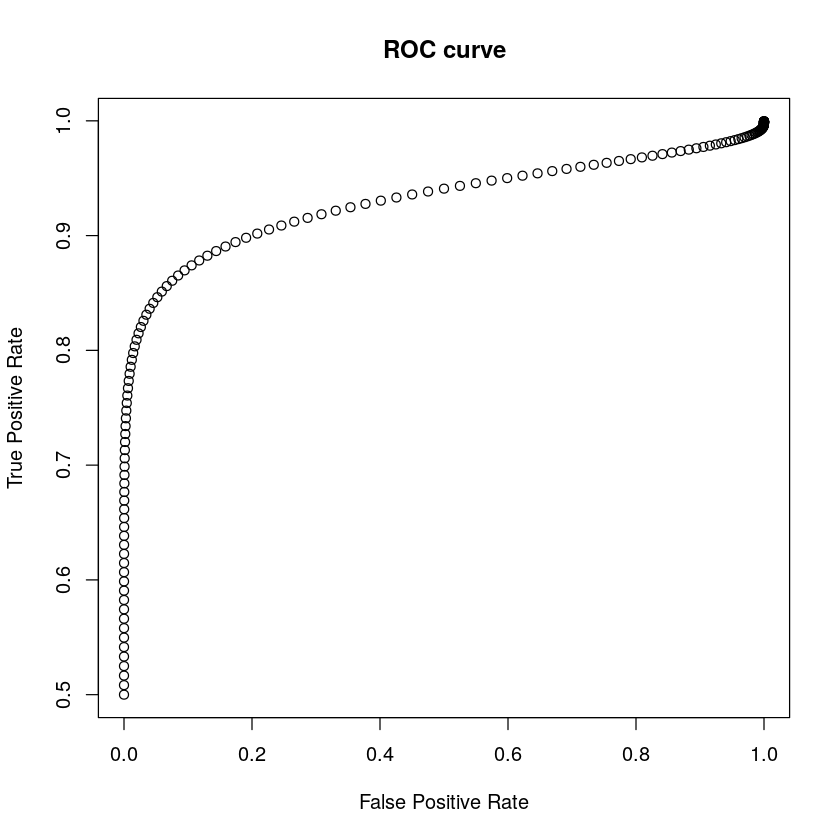

In [17]:
Delta = seq(-0.8, 0.8, by = 0.01)
z0 = (0.8 - Delta)/0.48
z1 = (Delta - 0.05)/0.16
tpr = sapply(z0, function(x) { pnorm(x) })
fpr = 1 - sapply(z1, function(x) { pnorm(x) })
plot(fpr, tpr, main = "ROC curve", xlab = "False Positive Rate",
     ylab = "True Positive Rate")


The AUC (area under the ROC curve) can be calculated using the **trapezoidal rule** as follows:


In [18]:
# we reverse the fpr and tpr vectors because the values were
# from right to left
x = rev(fpr)
y = rev(tpr)
AUC = sum(diff(x) * (head(y,-1)+tail(y,-1)))/2
AUC

[1] 0.9308586


## Task 5: Obstetrics

We are given that $\mu=112oz$ and $\sigma=20.6oz$ for a population of 1000 birthweights. In Figure 6.4b of the book we can see the sampling distribution of the mean for 200 samples of size $n=5$ taken from that population. Also, $1lb=16oz\Rightarrow 0.5lb=8oz$.

### Problem 6.52

If the central-limit theorem holds and so $z=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}\sim N(0,1)$, the probability that the sample mean should fall within 0.5lb of the population mean is:
$$P(\mu-8\leq \bar{x} \leq\mu+8)=P(104\leq\bar{x}\leq120)=P(-0.8683\leq z \leq0.8683)=2P(z\leq 0.8683)-1\simeq61.5\%$$

### Problem 6.53

The probability that the sample mean should fall within 1lb of the population mean is:
$$P(\mu-16\leq \bar{x} \leq\mu+16)=P(96\leq\bar{x}\leq128)=P(-1.736\leq z \leq 1.736)=2P(z\leq 1.736)-1\simeq91.7\%$$

### Problem 6.54

Using the data from the Figure 6.4b, we matched for each sample mean a value representing the presentage of samples which had that mean value and so, we calculated an estimation of the proportion of sample means that fall in the ranges specified in the 2 previous problems. Note that these values are usually overestimated and so we expect the actual results to be less than what shown below:
$$P(\{104,120\})=\sum_{b=104,b=+2}^{120} v(b)\simeq5+8+12.5+8.5+6.5+5+7+9+8=69.5\%$$
$$P(\{96,128\})=\sum_{b=96,b+=2}^{102} v(b)+\sum_{b=104,b+=2}^{120} v(b) + \sum_{b=122,b+=2}^{128} v(b)\simeq1.5+1.5+3.5+4.5+69.5+4+6+3+2.5=96\%$$

### Problem 6.55

The estimated actual proportions are very close to the predicted ones (less than $8\%$ and $4\%$ difference in the first and second case respectively) which means that using the central-limit theorem with a sample size of $n=5$ from this population is applicable/justifiable.

## Task 5: Infectious Disease

The data needed for this task are available in Table 2.13 (Hospital-stay data) in the Rosner 8th edition Biostatistics book, but we can download the dataset for ease of use using the **Hmisc** library we imported in the first task (`getHdata` gets the data from [here](http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets)):


In [19]:
getHdata(hospital)
hospital

id,duration,age,sex,temp,wbc,antibiotic,bculture,service
1,5,30,female,99.0,8,no,no,med
2,10,73,female,98.0,5,no,yes,med
3,6,40,female,99.0,12,no,no,surg
4,11,47,female,98.2,4,no,no,surg
5,5,25,female,98.5,11,no,no,surg
6,14,82,male,96.8,6,yes,no,surg
7,30,60,male,99.5,8,yes,yes,med
8,11,56,female,98.6,7,no,no,med
9,17,43,female,98.0,7,no,no,med
10,3,50,male,98.0,12,no,yes,surg



In this dataset, each row represents a patient discharged from a selected Pennsylvania hospital and includes info like the sex, age, duration of the hospital stay, first temperature measurement, white blood count, etc. for each patient. Next, we calculate the mean and standard deviation of some of the variables of this sample data since we will need them for the calculation of the confidence intervals (CI) in the next problems. Note that the mean $\mu$ and standard deviation $\sigma$ of these variables for the population (total number of patients discharged from all Pennsylvania hospitals) are **unknown** and so we will use the *t-distribution* for the calculation of the CIs.


In [20]:
age_mean = mean(hospital$age)
age_sd = sd(hospital$age)
wbc_mean = mean(hospital$wbc)
wbc_sd = sd(hospital$wbc)
d = c(age_mean, age_sd, wbc_mean, wbc_sd)
print(d)

[1] 41.2400 20.1024  7.8400  3.2104


So, $\bar{x}_{age}=41.24,s_{age}=20.10, \bar{x}_{wbc}=7.84,s_{wbc}=3.2104$. The sample data size is $n=25$.

### Problem 6.11

A 95% CI for the mean age is:
$$CI=(\bar{x}_{age}-t_{n-1,1-a/2}\cdot \frac{s_{age}}{\sqrt{n}},\bar{x}_{age}+t_{n-1,1-a/2}\cdot \frac{s_{age}}{\sqrt{n}})$$
where $1-a=0.95\Rightarrow a=0.05\Rightarrow\frac{a}{2}=0.025\Rightarrow 1-\frac{a}{2}=0.975$, so:

$$CI=(41.24-t_{24,0.975}\cdot \frac{20.10}{\sqrt{25}},41.24+t_{24,0.975}\cdot \frac{20.10}{\sqrt{25}})=(32.94,49.54)$$
where $t_{24,0.975}=2.064$.


In [21]:
qt(0.975, df = 24)

[1] 2.063899


### Problem 6.12

A 95% CI for the mean white blood count is:
$$CI=(\bar{x}_{wbc}-t_{n-1,1-a/2}\cdot \frac{s_{wbc}}{\sqrt{n}},\bar{x}_{wbc}+t_{n-1,1-a/2}\cdot \frac{s_{wbc}}{\sqrt{n}})$$
where again $1-a=0.95\Rightarrow 1-\frac{a}{2}=0.975$ and $t_{24,0.975}=2.064$, so:

$$CI=(7.84-2.064\cdot \frac{3.2104}{\sqrt{25}},7.84+2.064\cdot \frac{3.2104}{\sqrt{25}})=(6.51,9.17)$$

### Problem 6.13

A 90% CI for the mean white blood count is the same formula as in the previous problem, only with $1-a=0.90\Rightarrow a=0.1\Rightarrow\frac{a}{2}=0.05\Rightarrow 1-\frac{a}{2}=0.95$. So: $t_{24,0.95}=1.711$.


In [22]:
qt(0.95, df = 24)

[1] 1.710882


$$CI=(7.84-1.711\cdot \frac{3.2104}{\sqrt{25}},7.84+1.711\cdot \frac{3.2104}{\sqrt{25}})=(6.74,8.94)$$

### Problem 6.14

In problem 6.12 we wanted a 95% CI while in problem 6.13 we asked for a CI with less confidence (90%). So, when we *relax* our confidence for the requested estimated interval (and by doing so, we are less sure that the mean is included in that interval), the correspoding CI is smaller in range and it is included in the higher confidence interval: $(6.74,8.94)_{90\%}\subset(6.51,9.17)_{95\%}$.

### Problem 6.15

The best point estimate of the percentage of males among patients discharged from Pennsylvania hospitals is the percentage of males getting discharged from the sample dataset of $n=25$ patients:


In [23]:
# we convert the gender data from strings (male, female)
# to numbers (0, 1), for ease of calculation of the sd below
gender_data = sapply(hospital$sex, function(x) { if (x == 'male') return(0) else return(1)})
sum(gender_data == 0)

[1] 11

So: $\hat{p}=\frac{11}{25}=44\%=\bar{x}_{men}$

### Problem 6.16

The standard error of the percentage of men discharged is calculated by the formula: $se=s_{men}/\sqrt{n}$, where $s_{men}$ is the standard deviation:


In [24]:
sd(gender_data)

[1] 0.5066228

So, $se=s_{men}/\sqrt{n}=0.5066228/\sqrt{25}=0.101$

### Problem 6.17

A 95% CI for the percentage of males among patients discharged from Pennsylvania hospitals is:
$$CI=(\bar{x}_{men}-t_{n-1,1-a/2}\cdot se,\bar{x}_{men}+t_{n-1,1-a/2}\cdot se)$$
where $\bar{x}_{men}=0.44,se=0.101,1-a=0.95\Rightarrow 1-\frac{a}{2}=0.975$ and $t_{24,0.975}=2.064$, so:

$$CI=(0.44-2.064\cdot 0.101,0.44+2.064\cdot 10.101)=(0.23, 0.65)$$

## Task 6: Cancer

It is given that $X=12$ events were reported in $T=22884$ person-years of follow-up of men that developed testicular cancer after they had the syrgery for undescended testis at the age of 13-15.

### Problem 7.114

The estimated incidence rate of testicular cancer among this group of men, expressed per $10^5$ person-years, is $52.44$ events:
$$\hat{\lambda}=\frac{X}{T}=\frac{12}{22884}=\frac{52.44}{10^5}=0.000524$$
The standardised incidence rate taken from the general Swedish population is given as $5.06$, which is probably per $10^5$ person-years, so:
$$\lambda=\frac{5.06}{10^5}=\frac{1.157}{22884}$$

### Problem 7.115

The expected number of events in the general population over 22884 person-years of follow-up, is:
$$\mu_0=\frac{1.157}{22884}\cdot22884=1.157 \text{ events}$$

### Problem 7.116

A 95% CI for the number of events among men who were 13-15 years at the age of surgery can be provided by assuming that the number of events is Poisson-distributed with parameter $\mu$ and using the Table 7 (Fundamentals of Biostatistics, Rosner, 8th Edition, page 881) with $1-a=0.95$ and number of observed events for this particular group (over 228844 person-years) $X=12$. So, the 95% CI for $\mu$ is: $(6.20, 20.96)=(c_1,c_2)$.

### Problem 7.117

In this problem, we are trying to access whether there is a significant difference $(p<0.05)$ between the incidence of testicular cancer in men treated surgically for undescended testis at age 13-15 vs. the general population. Using the critical-value method (Fundamentals of Biostatistics, Rosner, 8th Edition, equation 7.34), our initial hypothesis is $H_0:\mu=\mu_0$ vs the alternative $H_1:\mu \neq \mu_0$ (a two-sided test) and since $\mu_0=1.157\lt c_1=6.20$, meaning that the general population's expected number of events is outside the 95% CI for the number of events in the specific group of people that had surgery at 13-15 years, we can safely reject our initial hypothesis and conclude that there is significant difference between the two groups.

### Problem 7.118

The lifetime risk (from age 15 to age 70) of testicular cancer for men which had the surgery at 15 years of age, assuming that the incidence rate (per person-year) remains constant over time, is:
$$risk=\hat{\lambda}\cdot t=\frac{12}{22884}\cdot(70-15)\simeq0.029\simeq3\%$$
This means that 3 out of 100 people who had surgery for undescended testis around their 15th year, will develop cancer.
